<a href="https://colab.research.google.com/github/aniket15031998/Loan-Prediction-Practice-Problem-Using-Python-/blob/main/Loan_Prediction_Problemipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project Name** - Loan Prediction Problem

### **Project Summarry**



Fulfillment Homes Financing, a prominent housing finance entity with a widespread presence in urban, semi-urban, and rural areas, is seeking to revolutionize its loan eligibility process. The company, specializing in home loans, envisions automating the real-time assessment of customer eligibility based on details provided in online application forms, encompassing critical factors like Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and more. This forward-looking initiative aims to employ data science and machine learning techniques to identify specific customer segments eligible for loans, facilitating targeted marketing efforts. By streamlining and optimizing the loan approval process, Fulfillment Homes Financing seeks to enhance operational efficiency and customer experience in the competitive realm of home financing.



#**Problem Statement**

### **It's a classification problem where we have to predict whether a loan would be approved or not.**[link text](https://)


# ***1. Knowing our Data***

### Importing Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

from sklearn.model_selection import train_test_split

### Dataset Loading

In [3]:
train=pd.read_csv('/content/drive/MyDrive/data /Loan Prediction /train_ctrUa4K.csv')
test=pd.read_csv('/content/drive/MyDrive/data /Loan Prediction /test_lAUu6dG.csv')

### Let's make a copy of the dataset so if we have to make any changes we do not lose original dataset

In [4]:
train_copy=train.copy() #here train dataset is used for training
test_copy=test.copy() #here test dataset is used for test the results
# we don't need to split the train and test data set in this case

### Dataset First View

In [5]:
train_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Dataset Information

In [13]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


We can see we have three format of datatypes -
object,int64 and float64

As we can see we have 12 independent variables and 1 dependent variable i.e Loan status in train dataset, we will use train dataset to train our model and test dataset to predict the loan status which is missing in test_data set

### Dataset Rows & Columns count

In [20]:
train_copy.shape , test_copy.shape

((614, 13), (367, 12))

### Duplicate Values

In [28]:
train_copy.duplicated().sum()

0

In [29]:
test_copy.duplicated().sum()

0

### Missing Values

In [33]:
train_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
test_copy.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

As we can see we have missing values in both the dataset and we will have to treat this issue further to aviod biased results

### Understanding our variables


In [36]:
train_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [37]:
test_copy.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001015,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [46]:
train_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
test_copy.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [48]:
for i in list(train_copy.columns):
  print(f'Unique values for {i} : {train_copy[i].unique()}')

Unique values for Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 

In [176]:
category_var = ['Gender','Married','Self_Employed','Credit_History']
ordinal_var = ['Dependents','Property_Area','Education']
numerical_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

# ***2. Data Vizualization, Storytelling & Experimenting with charts : Understanding the relationships between variables***

## **Univariate Analysis**

#### Chart - 1 - Target Variable

<Axes: title={'center': 'Loan_Status'}>

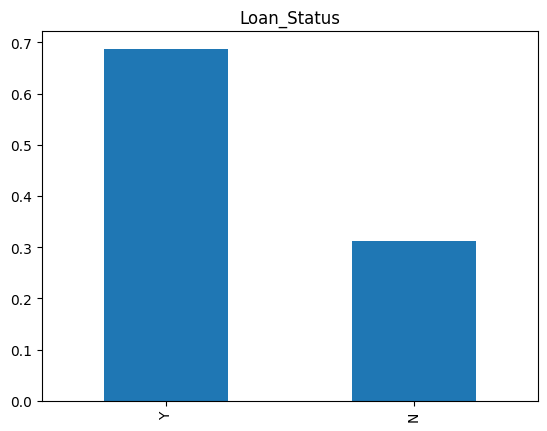

In [113]:
train_copy['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')

We picked this chart to study the laon approval distribution

**Insights**
: Almost 70% of total applications are approved leaving 30% rejected




#### Chart - 2 - Category Variable

<Axes: xlabel='Gender', ylabel='count'>

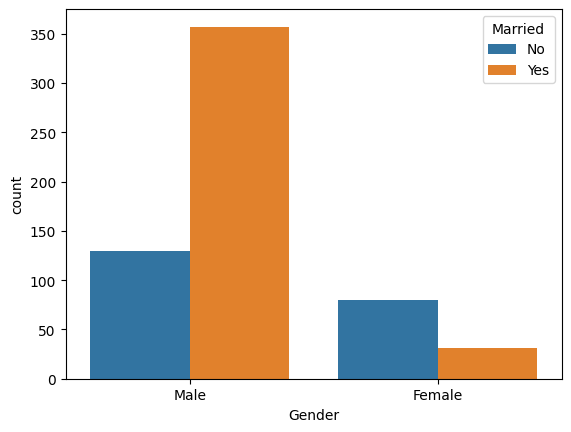

In [136]:
sns.countplot(x=train_copy['Gender'],hue=train_copy['Married'])

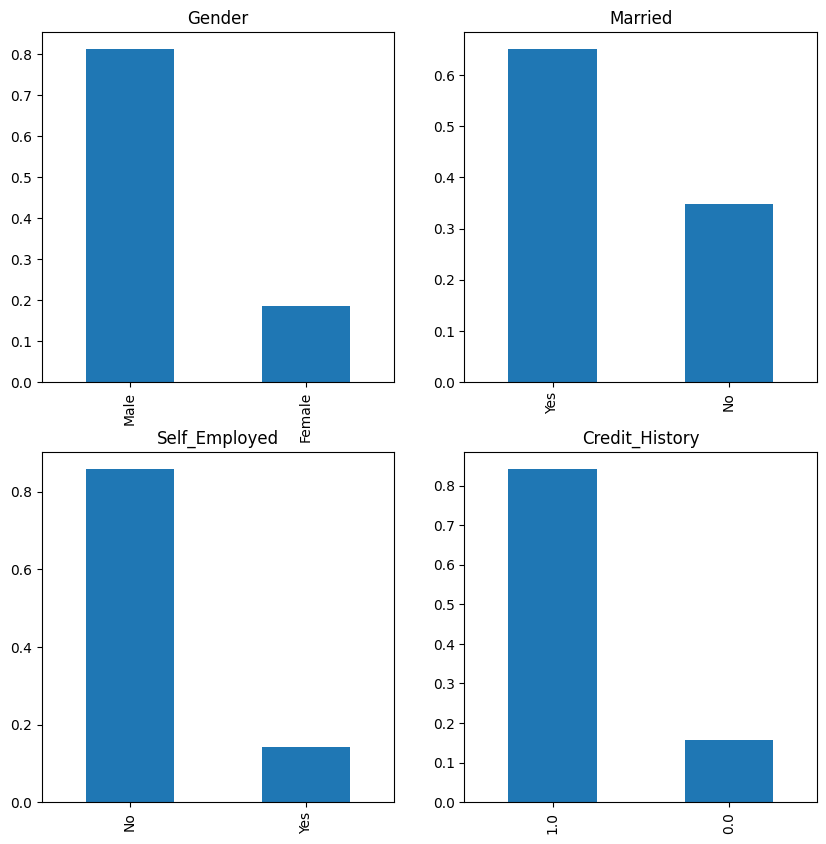

In [116]:
plt.figure(figsize=(10,10))
counter=1

for i in category_var:
  plt.subplot(2,2,counter)
  train_copy[i].value_counts(normalize=True).plot.bar(title=i)
  counter+=1


**Insights**

1.   80% applicants in the dataset are male
2.   Around 65% applicants are married
3.   Around 15% applicants are self employed
4.   Around 85% applicants have clear credit_history i.e they had paid
their earlier debts.
5.   Most of the male applicants are married while most of the female applicants are unmarried



#### Chart - 2 - Ordinal Variables

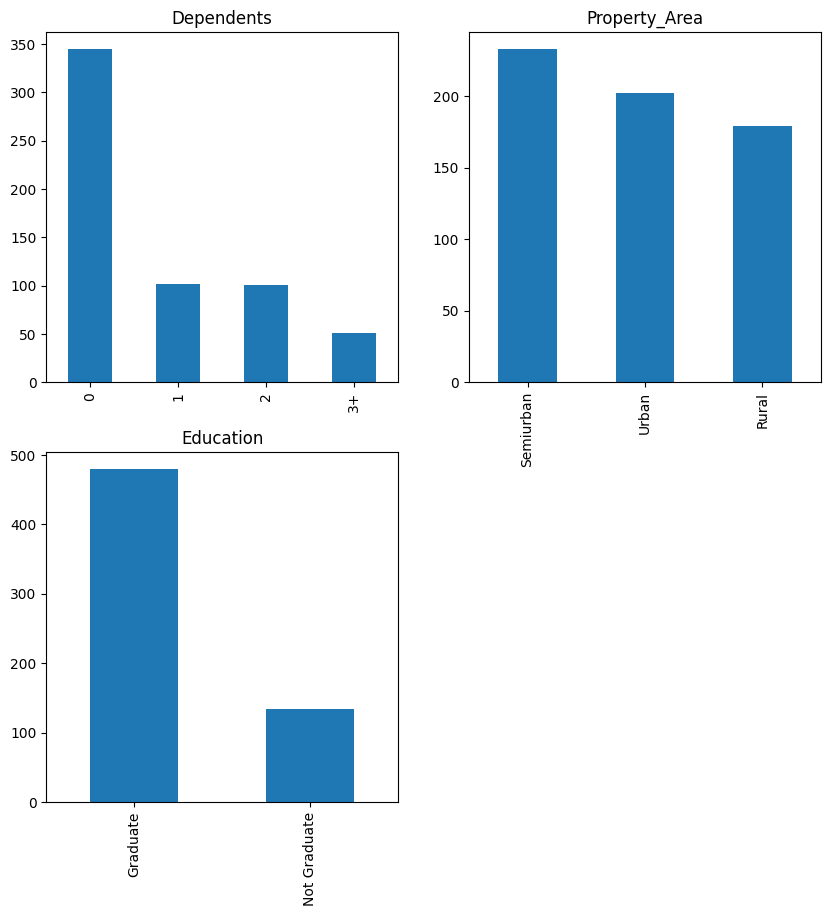

In [128]:
plt.figure(figsize=(10,10))
counter=1

for i in ordinal_var:
  plt.subplot(2,2,counter)
  train_copy[i].value_counts(normalize=True).plot.bar(title=i)
  counter+=1

**Insights**


1.   Almost 58% applicants don't have any dependents
2.   Most of the applicants are from semi-urban area
3.   Almost 80% applicants are graduated



#### Chart - 3 - Numerical Variables

In [ ]:
numerical_var = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

##### Numerical Var - ApplicantIncome

<Axes: title={'center': 'ApplicantIncome'}>

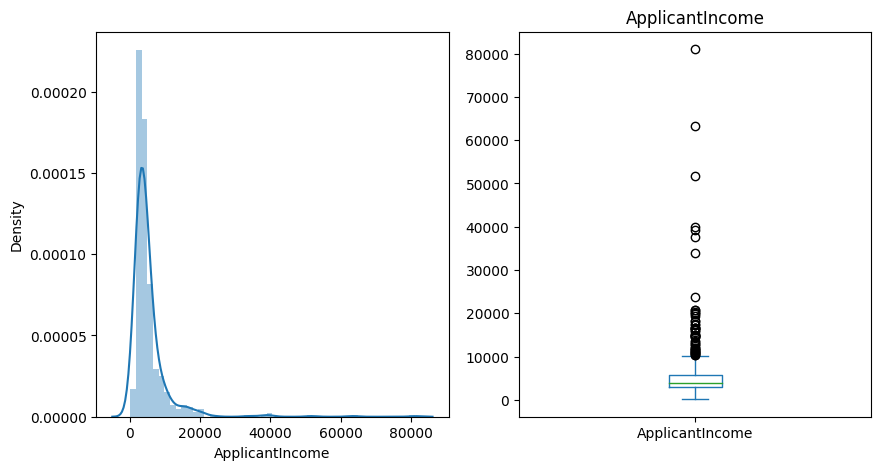

In [139]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(train_copy['ApplicantIncome'])

plt.subplot(1,2,2)
train_copy['ApplicantIncome'].plot.box(title='ApplicantIncome')

**Insights**


1.   As we can see from distribution plot it is left skewed which means its not normal we will try to make it normal later.
2.   From box plot we can see that their are outliers due to income disparity in society



As we have seen outliers in box plot of applicant income this will be due to income disparity which will be related to education of individual.

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

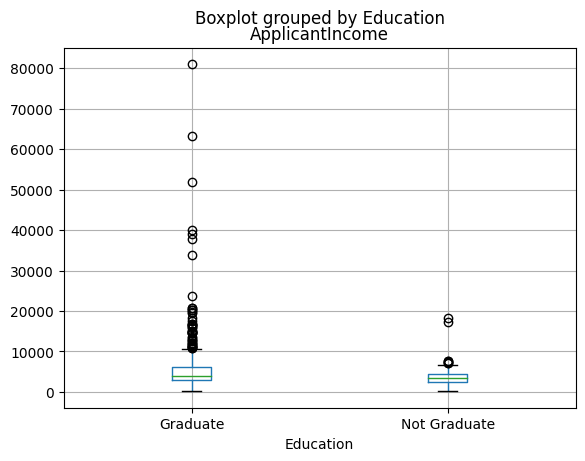

In [123]:
train_copy.boxplot(column='ApplicantIncome',by='Education')

This graph shows graduate candidats have high income values compared to not graduated.

##### Numericl Variable - Coapplicant Income

<Axes: title={'center': 'CoapplicantIncome'}>

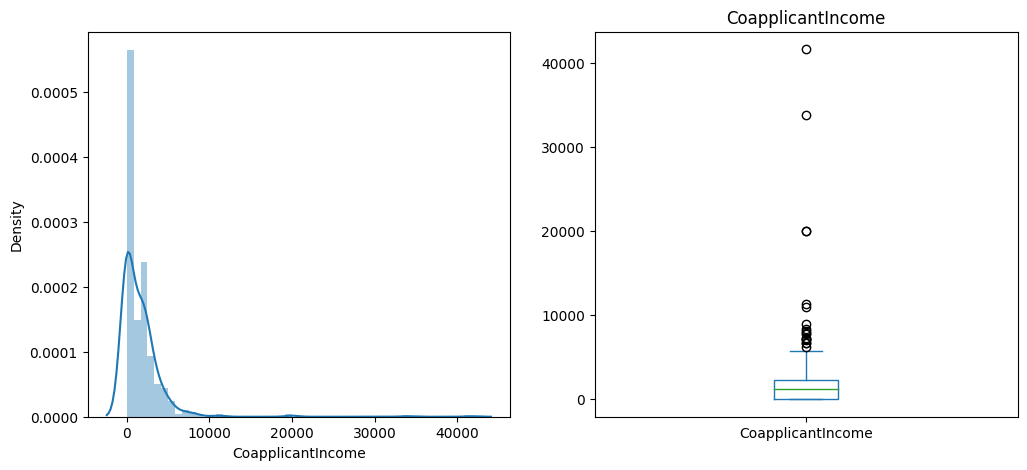

In [141]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(train_copy['CoapplicantIncome'])

plt.subplot(1,2,2)
train_copy['CoapplicantIncome'].plot.box(title='CoapplicantIncome')

**Insights**


1.   We can that it is left skewed and not normal, also have outliers which we will treat later and make it normal.


##### Numerical Variable - Loan Amount

<Axes: title={'center': 'LoanAmount'}>

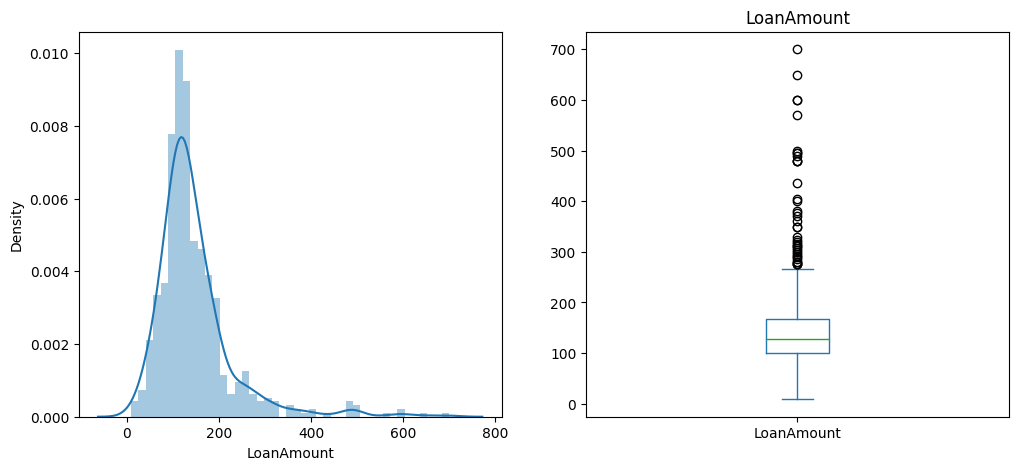

In [142]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])

plt.subplot(1,2,2)
train_copy['LoanAmount'].plot.box(title='LoanAmount')

**Insights** : We can see lot of outliers in this variable , but it fairly normal distributed. We will treat outliers later

##### Numerical Variable - Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

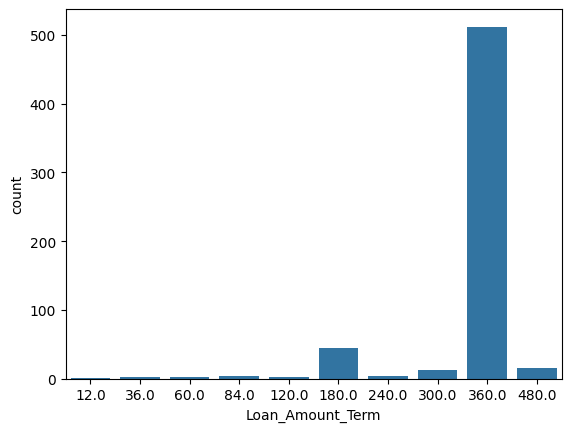

In [148]:
sns.countplot(x=train_copy['Loan_Amount_Term'])

**Insights** : Most of the loan tenure is of 360 months.

## **Bivariate Analysis**

In this we will check relatioship between dependent variable Loan Approval with all individual variables of different categories.

### Category Variable

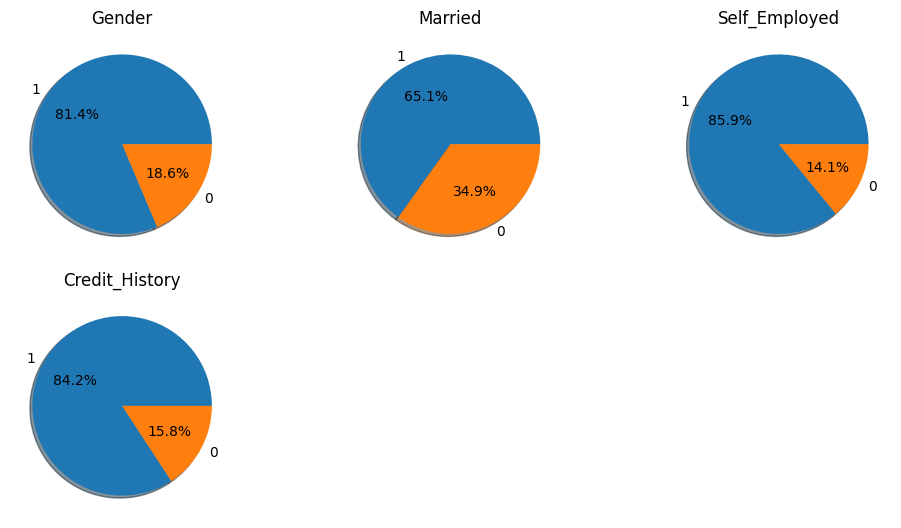

In [178]:
plt.figure(figsize=(10,8))
counter=1

for var in category_var:
  plt.subplot(3,3,counter)
  plt.pie(train_copy[var].value_counts(),labels=('1','0'),autopct='%1.1f%%',shadow=True)
  plt.title(var)
  counter+=1
  plt.tight_layout()

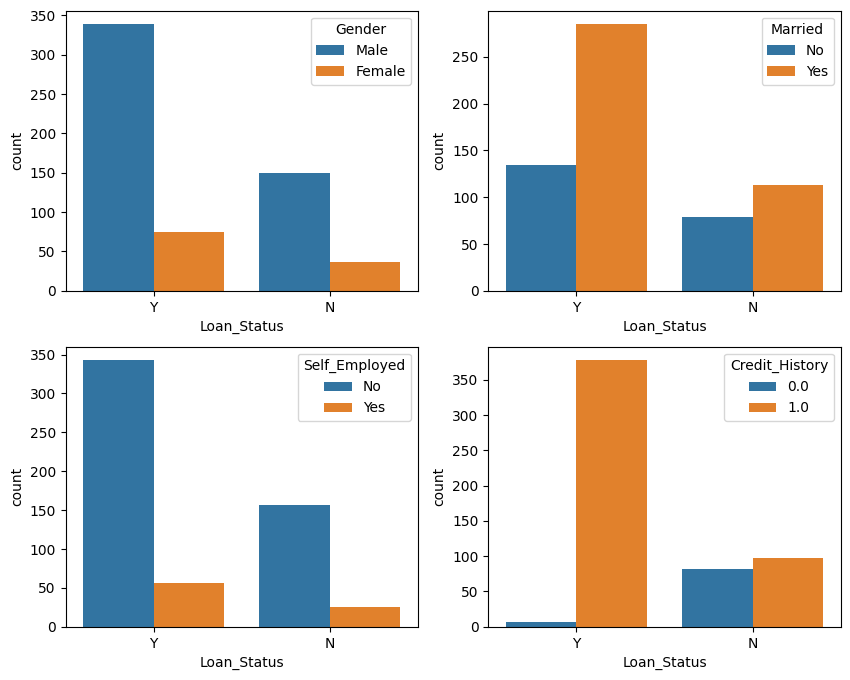

In [174]:
plt.figure(figsize=(10,8))
counter=1

for i in category_var:
  plt.subplot(2,2,counter)
  sns.countplot(hue=train_copy[i],x=train_copy['Loan_Status'])
  counter+=1


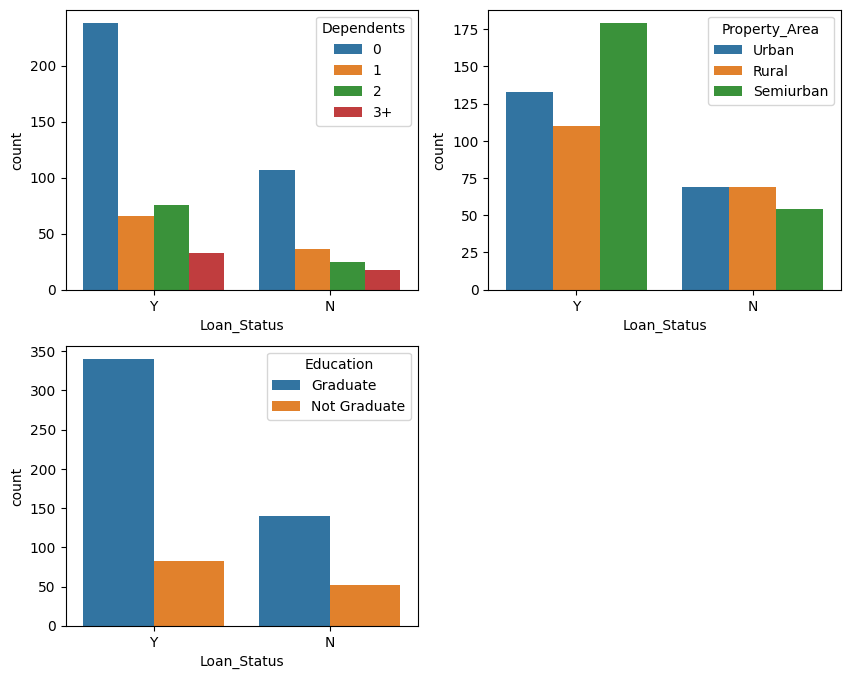

In [177]:
plt.figure(figsize=(10,8))
counter=1

for i in ordinal_var:
  plt.subplot(2,2,counter)
  sns.countplot(hue=train_copy[i],x=train_copy['Loan_Status'])
  counter+=1